In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("data.csv", sep = ",", encoding = 'latin1')
data.head(10)

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,â¬172.1M
6,6,177003,L. ModriÄ,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,â¬137.4M
7,7,176580,L. SuÃ¡rez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,â¬164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,â¬104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,AtlÃ©tico Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,â¬144.5M


In [3]:
df = data.drop(['ï»¿','ID','Photo','Flag','Club Logo','Real Face','Jersey Number','Loaned From']
, axis=1)

In [4]:
print(df['Position'].isnull().sum())

60


In [5]:
df['Posicion'] = df['Position']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [7]:
def simple_position(x):
    if (x == 'GK'):
        return 'Arquero'
    elif ((x == 'RB') | (x == 'LB') | (x == 'CB') | (x == 'LCB') | (x == 'RCB') | (x == 'RWB') | (x == 'LWB') ):
        return 'Defensor'
    elif ((x == 'LDM') | (x == 'CDM') | (x == 'RDM') | (x == 'LM') | (x == 'LCM') | (x == 'CM') | (x == 'RCM') | (x == 'RM') | (x == 'LAM') | (x == 'CAM') | (x == 'RAM') | (x == 'LW') | (x == 'RW')):
        return 'Volante'
    elif ((x == 'RS') | (x == 'ST') | (x == 'LS') | (x == 'CF') | (x == 'LF') | (x == 'RF')):
        return 'Delantero'


In [8]:
df['Position2'] = df.Position.apply(lambda x: simple_position(x))

In [9]:
df['Position2'].value_counts()

Volante      7589
Defensor     5866
Delantero    2667
Arquero      2025
Name: Position2, dtype: int64

In [10]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause',

In [11]:
df = df.drop(['Posicion', 'Joined', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Contract Valid Until'], axis= 1)

In [12]:
df.isnull().sum().head(50)

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility                      48
Reaction

In [13]:
mascara_nulos = df['Vision'].isnull()

In [14]:
df.shape

(18207, 54)

In [15]:
df = df.dropna()

In [16]:
df.shape

(16643, 54)

In [17]:
dummy = pd.get_dummies(df['Position2'])
df = pd.concat([df, dummy], axis=1)

In [18]:
df.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Position2,Arquero,Defensor,Delantero,Volante
0,L. Messi,31,Argentina,94,94,FC Barcelona,â¬110.5M,â¬565K,2202,Left,...,11.0,15.0,14.0,8.0,â¬226.5M,Delantero,0,0,1,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,â¬77M,â¬405K,2228,Right,...,11.0,15.0,14.0,11.0,â¬127.1M,Delantero,0,0,1,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,â¬118.5M,â¬290K,2143,Right,...,9.0,15.0,15.0,11.0,â¬228.1M,Volante,0,0,0,1
3,De Gea,27,Spain,91,93,Manchester United,â¬72M,â¬260K,1471,Right,...,85.0,87.0,88.0,94.0,â¬138.6M,Arquero,1,0,0,0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,â¬102M,â¬355K,2281,Right,...,13.0,5.0,10.0,13.0,â¬196.4M,Volante,0,0,0,1


def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

df['Weight'] = df['Weight'].apply(clean_weight).astype('float')
#fifa['Weight'].fillna((fifa['Weight'].mean()), inplace = True)

def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


df['Height'] = df['Height'].apply(clean_height)
#fifa['Height'].fillna((fifa['Height'].mean()), inplace = True)

def value_and_wage_conversion(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)


#df['Value'] = df['Value'].apply(lambda x: value_and_wage_conversion(x))
#df['Wage'] = df['Wage'].apply(lambda x: value_and_wage_conversion(x))
#df['Release Clause'] = df['Release Clause'].apply(lambda x: value_and_wage_conversion(x))
#fifa['Release Clause'].fillna(fifa['Release Clause'].mean(), inplace = True)


In [19]:
df['Weight'] = df['Weight'].str.replace('lbs','')

In [20]:
df['Weight'].value_counts()

165    1380
154    1310
176     955
172     892
159     861
161     854
163     818
170     791
168     771
174     657
150     621
157     561
181     529
183     484
152     464
179     464
143     453
187     404
148     396
185     394
146     329
141     299
190     263
194     262
139     191
192     180
137     157
198     137
196     132
132     112
201      84
134      78
203      69
205      55
207      43
209      30
128      29
130      27
212      21
123      18
126      14
214      10
121       8
216       7
117       6
119       4
218       4
223       3
110       2
236       2
225       2
220       1
227       1
115       1
243       1
234       1
229       1
Name: Weight, dtype: int64

In [21]:
df['Weight'] = df['Weight'].astype(np.int)

In [22]:
df['Weight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 16643, dtype: int32>

In [23]:
df['Value'] = df['Value'].str.replace('€','')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16643 non-null  object 
 1   Age                       16643 non-null  int64  
 2   Nationality               16643 non-null  object 
 3   Overall                   16643 non-null  int64  
 4   Potential                 16643 non-null  int64  
 5   Club                      16643 non-null  object 
 6   Value                     16643 non-null  object 
 7   Wage                      16643 non-null  object 
 8   Special                   16643 non-null  int64  
 9   Preferred Foot            16643 non-null  object 
 10  International Reputation  16643 non-null  float64
 11  Weak Foot                 16643 non-null  float64
 12  Skill Moves               16643 non-null  float64
 13  Work Rate                 16643 non-null  object 
 14  Body T

In [25]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Position2', 'Arquero', 'Defensor', 'Delantero',
       'Volante'],
      dtype='object')

In [26]:
train_cols = ['Overall', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength','LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
X = df[train_cols]
y = df['Position2']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
#X['Body Type'].head(20)

Utilizamos sklearn para standarizar la matriz de Features

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
clf = LogisticRegression(C=1e10,solver='lbfgs')

Entrenamos y aplicamos nuestro modelo sobre datos de test

In [31]:
clf.fit(X_train, y_train)

C:\Users\Agustin\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[ 608    0    0    0]
 [   0 1647    2  147]
 [   0    2  672  116]
 [   0  129  101 2069]]


In [34]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred).round(2))

Accuracy= 0.91


In [36]:
y_test.value_counts(normalize=True).round(2)

Volante      0.42
Defensor     0.33
Delantero    0.14
Arquero      0.11
Name: Position2, dtype: float64

In [37]:
y_test.describe()

count        5493
unique          4
top       Volante
freq         2299
Name: Position2, dtype: object

In [38]:
#1.0 - y_test.mean().round(3)

In [39]:
pd.Series(y_pred).unique()

array(['Arquero', 'Volante', 'Defensor', 'Delantero'], dtype=object)

In [40]:
pd.Series(y_pred).value_counts()

Volante      2332
Defensor     1778
Delantero     775
Arquero       608
dtype: int64

In [41]:
y_pred_proba = clf.predict_proba(X_test)

In [42]:
display(y_pred_proba.shape, y_pred_proba)

(5493, 4)

array([[1.00000000e+00, 2.01736676e-12, 9.17431763e-17, 7.96594646e-15],
       [3.28829485e-06, 1.27290312e-01, 1.15270870e-05, 8.72694873e-01],
       [5.39718444e-05, 2.18065881e-04, 3.46348613e-01, 6.53379350e-01],
       ...,
       [1.06667112e-06, 9.21126114e-01, 3.42252153e-06, 7.88693964e-02],
       [8.28171602e-06, 1.45394456e-05, 9.96825584e-01, 3.15159451e-03],
       [1.91561099e-06, 4.16428523e-02, 6.02601848e-03, 9.52329214e-01]])

In [43]:
all(pd.Series(y_pred_proba[:,1]>0.5).astype(int)==pd.Series(y_pred))

False

In [45]:
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_pred_proba, 0.3)[:,1]

C:\Users\Agustin\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [46]:
y_pred_logit = (y_probs_logit_left > 0.3).astype(int)
y_pred_logit

array([0, 0, 0, ..., 1, 0, 0])

**Accuracy**

In [47]:
print('Acc umbral 0.5 =', accuracy_score(y_test, y_pred))
print('Acc umbral 0.3 =', accuracy_score(y_test, y_pred_logit))

Acc umbral 0.5 = 0.9095212088112142
Acc umbral 0.3 = 0.0


In [73]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[1,1])
print('\nTrue Negatives(TN) = ', conf_mat[0,0])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])

Confusion matrix

 [[ 608    0    0    0]
 [   0 1647    2  147]
 [   0    2  672  116]
 [   0  129  101 2069]]

True Positives(TP) =  1647

True Negatives(TN) =  608

False Positives(FP) =  0

False Negatives(FN) =  0


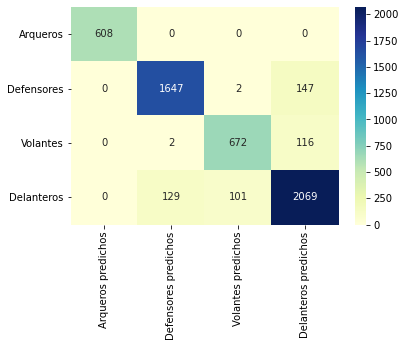

In [75]:
conf_mat_df = pd.DataFrame(data=conf_mat, 
                           index=['Arqueros', 'Defensores','Volantes','Delanteros'], 
                           columns=['Arqueros predichos','Defensores predichos','Volantes predichos','Delanteros predichos'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');